# Analisis de Variables (datos Telecom)

En la carpeta data encontrará el archivo 'telecom-customer-churn.tab'. Estos son datos reales de
una empresa de telecomunicaciones referidos a la "pérdida" (variable "churn") de clientes.
El departamento de MKT de la telco está interesado en reconocer qué variables categóricas de
este dataset están relacionadas o no con la variable "churn".

Mediante la Prueba de Hipótesis de Chi Cuadrado Ud deberá determinar qué variables
categóricas del dataset están relacionadas o no con churn, indicando el valor de chi cuadrado y
de p en cada caso. Utilizaremos una significancia del 5%, para determinar si hay o no relación.

α = 0.05

En los casos que sí haya relación deberá presentar:
la Tabla de Contingencia entre la variable en cuestión y churn
algún gráfico que sirva al personal de marketing para efectuar sus análisis específicos (queda
a su criterio qué tipo de gráfico).

Nota: los valores de la columna SeniorCitizen así que no la usaremos.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
from scipy.stats import chi2_contingency

Esta sería la Tabla de Contingencia Esperada si la $H_0$ es verdadera:

In [13]:
df0 = pd.read_csv(r'data/telecom-customer-churn.tab', sep='\t', engine='python')
df0.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590-VHVEG
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,5575-GNVDE
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668-QPYBK
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795-CFOCW
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237-HQITU


Caso 1: Supongamos que los datos observados en la encuesta fueran los siguientes:

In [14]:
df = df0[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','customerID','Churn']]
columns_names = df.columns.values

## Itareacion para evitar repeticiones (copiar y pegar)

In [15]:
for i in range(15):
    globals()['contingencia'+str(i)] = pd.crosstab(df[columns_names[i]], df.Churn)
    globals()['contingencia'+str(i)+'_'] = pd.crosstab(df[columns_names[i]], df.Churn, normalize ='columns')*100
    globals()['contingencia'+str(i)+'__'] = pd.crosstab(df[columns_names[i]], df.Churn, margins=True, margins_name='Total')
    globals()['chi2_'+str(columns_names[i])],globals()['p'+str(i)],globals()['libertad_'+str(i)],globals()['conting_'+str(i)] = chi2_contingency(globals()['contingencia'+str(i)])
    

## Analisis Rápido

In [16]:
lista = []
for i in range(15):
    variable = columns_names[i]
    chi2 = round(globals()['chi2_'+str(i)],2)
    p = round(globals()['p_'+str(i)],4)
    Grados_Libertad = globals()['libertad_'+str(i)]

    if globals()['p_'+str(i)] > 0.05:
        aux = ('No existe relación')
    else:
        aux = ('Si existe relación')
    lista.append({'Variable vs Churn' : variable,'Chi2' : chi2, 'P' : p, 'G_lib' : Grados_Libertad, 'Relación' : aux})

KeyError: 'chi2_0'

In [12]:
df_aux = pd.DataFrame(lista)
df_aux

""


## Análisis pormenorizado
### Análisis y Gráficos para mejorar la interpretación 

### Partner vs Churn

In [172]:
contingencia0

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [234]:
# contingencia0_

In [233]:
# contingencia0__

In [256]:
print("tabla de contingencia esperada")
print (conting_0)

tabla de contingencia esperada
[[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]]


<AxesSubplot:xlabel='Partner'>

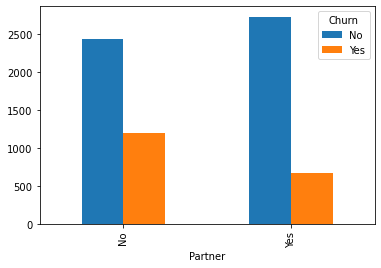

In [177]:
contingencia1.plot.bar()

<AxesSubplot:xlabel='Churn'>

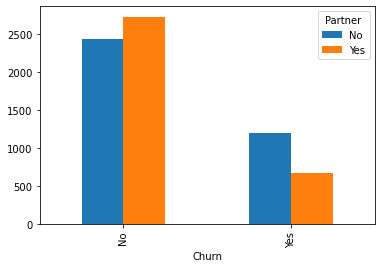

In [178]:
np.transpose(contingencia1).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='Partner'>

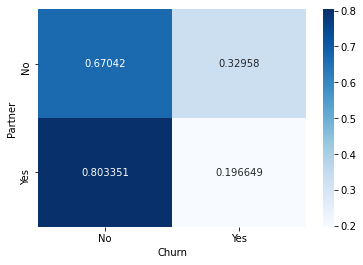

In [283]:
sn.heatmap(contingencia1.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### Dependents vs churn

In [136]:
contingencia2

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


In [126]:
# contingencia2_

In [125]:
# contingencia2__

In [170]:
print("tabla de contingencia esperada")
print (conting_2)

tabla de contingencia esperada
[[3623.93042737 1309.06957263]
 [1550.06957263  559.93042737]]


<AxesSubplot:xlabel='Dependents'>

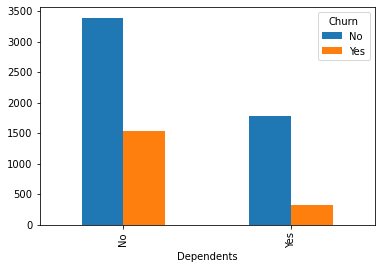

In [171]:
contingencia2.plot.bar()

<AxesSubplot:xlabel='Churn'>

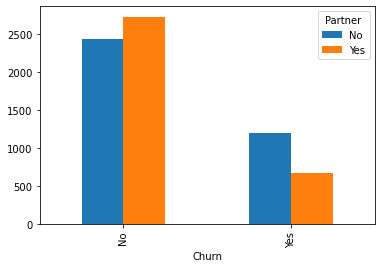

In [298]:
np.transpose(contingencia2).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='Dependents'>

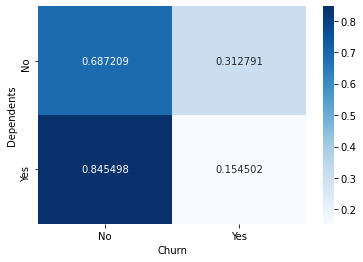

In [284]:
sn.heatmap(contingencia2.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### MultipleLines vs churn

In [218]:
contingencia4

Churn,No,Yes,Total
PhoneService,,,
No,512,170,682
Yes,4662,1699,6361
Total,5174,1869,7043


In [183]:
# contingencia4_

In [184]:
# contingencia4__

In [193]:
print("tabla de contingencia esperada")
print (conting_4)

tabla de contingencia esperada
[[2490.39613801  899.60386199]
 [ 501.01774812  180.98225188]
 [2182.58611387  788.41388613]]


<AxesSubplot:xlabel='MultipleLines'>

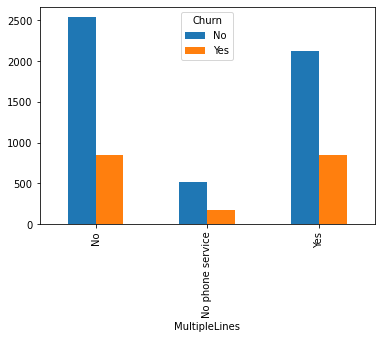

In [297]:
contingencia4.plot.bar()

<AxesSubplot:xlabel='Churn'>

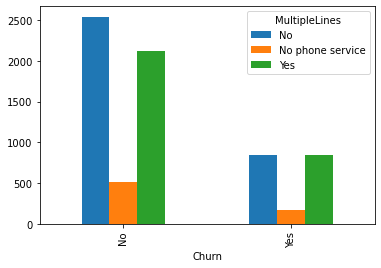

In [308]:
np.transpose(contingencia4).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='MultipleLines'>

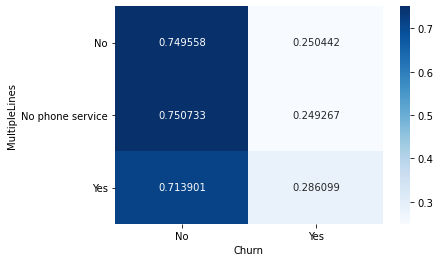

In [285]:
sn.heatmap(contingencia4.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### InternetService vs churn

In [191]:
contingencia5

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [189]:
# contingencia5_

In [190]:
# contingencia5__

In [194]:
print("tabla de contingencia esperada")
print (conting_5)

tabla de contingencia esperada
[[1778.53954281  642.46045719]
 [2274.41488002  821.58511998]
 [1121.04557717  404.95442283]]


<AxesSubplot:xlabel='InternetService'>

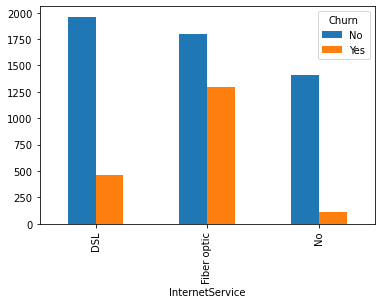

In [298]:
contingencia5.plot.bar()

<AxesSubplot:xlabel='Churn'>

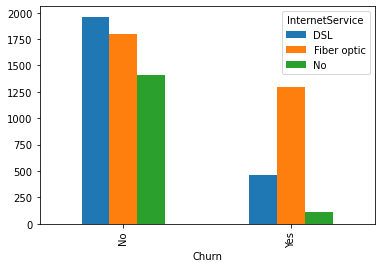

In [309]:
np.transpose(contingencia5).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='InternetService'>

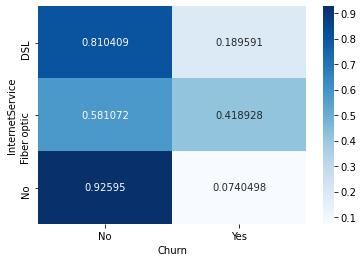

In [286]:
sn.heatmap(contingencia5.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### OnlineSecurity vs churn

In [185]:
contingencia6

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


In [187]:
# contingencia6_

In [197]:
print("tabla de contingencia esperada")
print (conting_6)

tabla de contingencia esperada
[[2569.73619196  928.26380804]
 [1121.04557717  404.95442283]
 [1483.21823087  535.78176913]]


<AxesSubplot:xlabel='OnlineSecurity'>

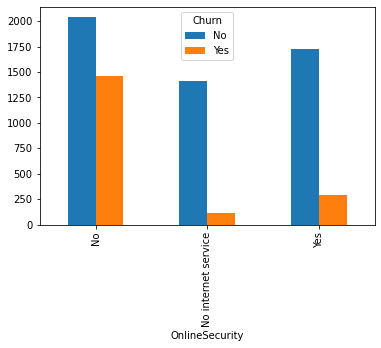

In [299]:
contingencia6.plot.bar()

<AxesSubplot:xlabel='Churn'>

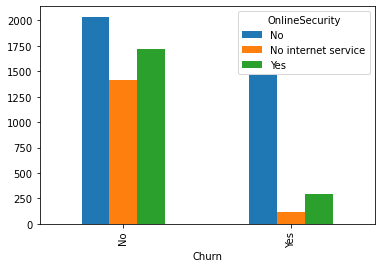

In [310]:
np.transpose(contingencia6).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='OnlineSecurity'>

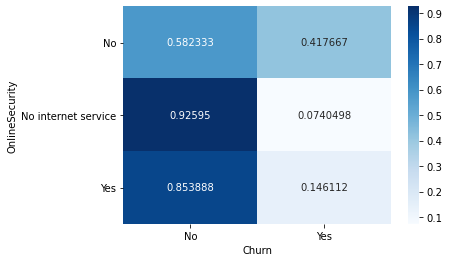

In [287]:
sn.heatmap(contingencia6.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### OnlineBackup vs churn

In [207]:
contingencia7

Churn,No,Yes
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


In [206]:
# contingencia7_

In [205]:
# contingencia7__

In [202]:
print("tabla de contingencia esperada")
print (conting_7)

tabla de contingencia esperada
[[2268.53783899  819.46216101]
 [1121.04557717  404.95442283]
 [1784.41658384  644.58341616]]


<AxesSubplot:xlabel='OnlineBackup'>

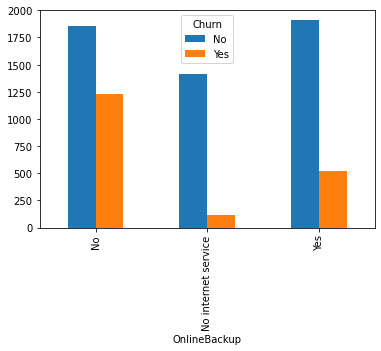

In [300]:
contingencia7.plot.bar()

<AxesSubplot:xlabel='Churn'>

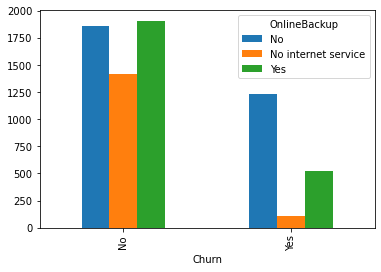

In [311]:
np.transpose(contingencia7).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='OnlineBackup'>

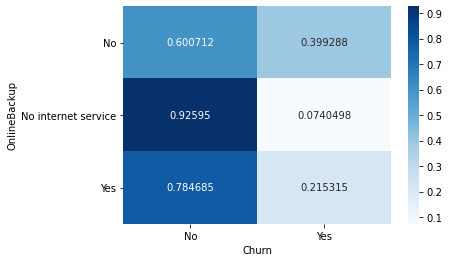

In [288]:
sn.heatmap(contingencia7.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### DeviceProtection vs churn

In [203]:
contingencia8

Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


In [204]:
# contingencia8_

In [209]:
print("tabla de contingencia esperada")
print (conting_8)

tabla de contingencia esperada
[[2273.68024989  821.31975011]
 [1121.04557717  404.95442283]
 [1779.27417294  642.72582706]]


<AxesSubplot:xlabel='DeviceProtection'>

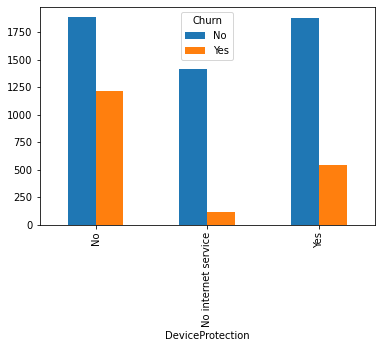

In [301]:
contingencia8.plot.bar()

<AxesSubplot:xlabel='Churn'>

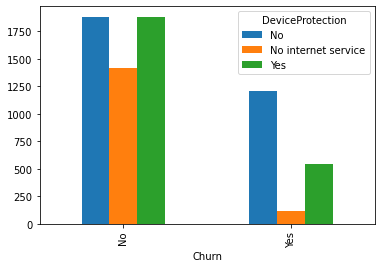

In [312]:
np.transpose(contingencia8).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='DeviceProtection'>

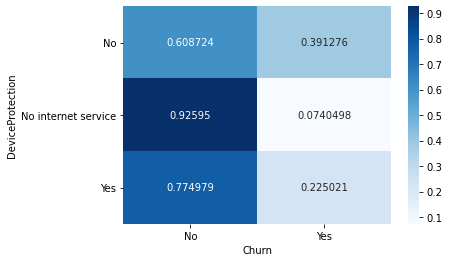

In [289]:
sn.heatmap(contingencia8.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### TechSupport vs churn

In [210]:
contingencia9

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


In [212]:
# contingencia9_

In [211]:
# contingencia9__

In [214]:
print("tabla de contingencia esperada")
print (conting_9)

tabla de contingencia esperada
[[2551.37043873  921.62956127]
 [1121.04557717  404.95442283]
 [1501.5839841   542.4160159 ]]


<AxesSubplot:xlabel='TechSupport'>

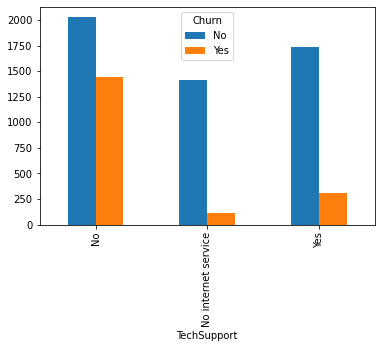

In [302]:
contingencia9.plot.bar()

<AxesSubplot:xlabel='Churn'>

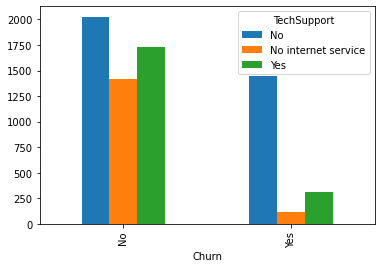

In [313]:
np.transpose(contingencia9).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='TechSupport'>

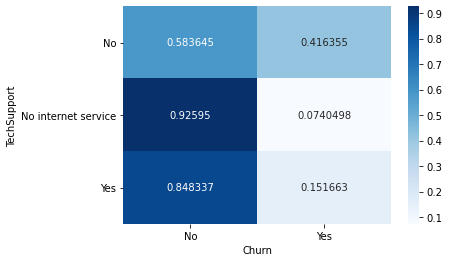

In [290]:
sn.heatmap(contingencia9.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### StreamingTV vs churn

In [264]:
contingencia10

Churn,No,Yes
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814


In [265]:
# contingencia10_

In [278]:
print("tabla de contingencia esperada")
print (conting_10)

tabla de contingencia esperada
[[2064.31066307  745.68933693]
 [1121.04557717  404.95442283]
 [1988.64375976  718.35624024]]


<AxesSubplot:xlabel='StreamingTV'>

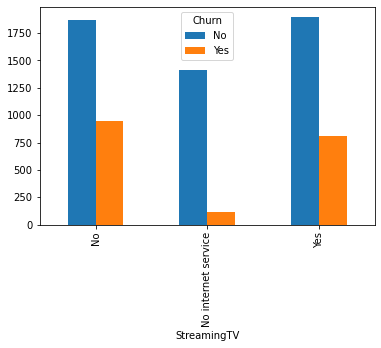

In [303]:
contingencia10.plot.bar()

<AxesSubplot:xlabel='Churn'>

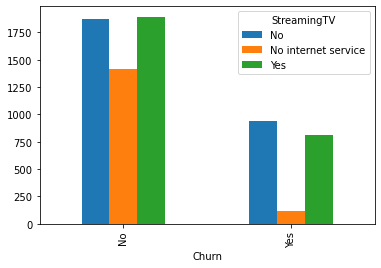

In [314]:
np.transpose(contingencia10).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='StreamingTV'>

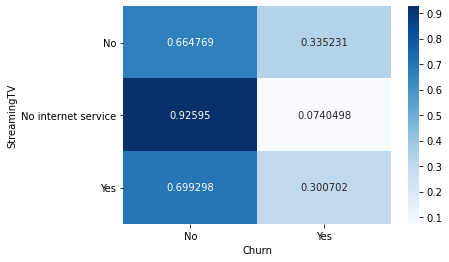

In [291]:
sn.heatmap(contingencia10.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### StreamingMovies vs churn

In [266]:
contingencia11

Churn,No,Yes
StreamingMovies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


In [267]:
# contingencia11_

In [274]:
print("tabla de contingencia esperada")
print (conting_11)

tabla de contingencia esperada
[[2045.94490984  739.05509016]
 [1121.04557717  404.95442283]
 [2007.00951299  724.99048701]]


<AxesSubplot:xlabel='Churn'>

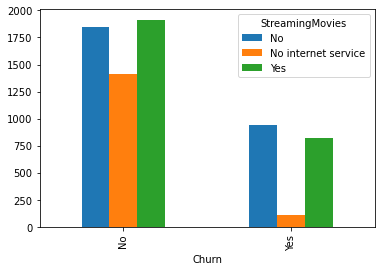

In [315]:
np.transpose(contingencia11).plot.bar()

<AxesSubplot:xlabel='StreamingMovies'>

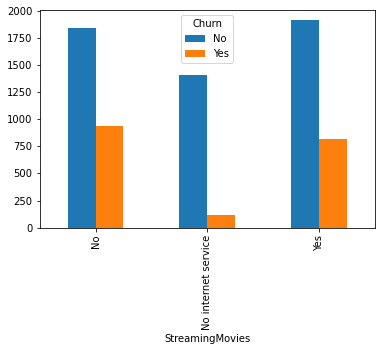

In [304]:
contingencia11.plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='StreamingMovies'>

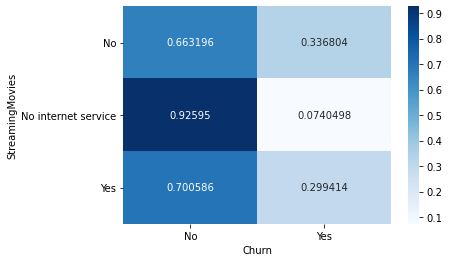

In [292]:
sn.heatmap(contingencia11.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### Contract vs churn

In [268]:
contingencia12

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [269]:
# contingencia12_

In [275]:
print("tabla de contingencia esperada")
print (conting_12)

tabla de contingencia esperada
[[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]


<AxesSubplot:xlabel='Contract'>

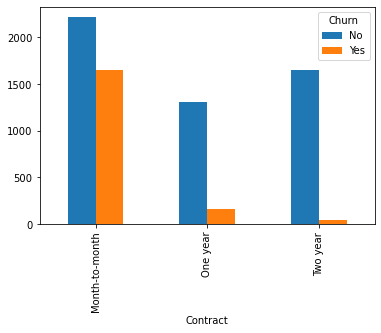

In [305]:
contingencia12.plot.bar()

<AxesSubplot:xlabel='Churn'>

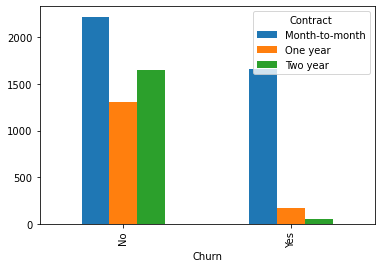

In [316]:
np.transpose(contingencia12).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

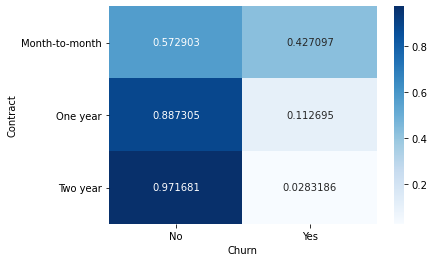

In [293]:
sn.heatmap(contingencia12.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### PaperlessBilling vs churn

In [271]:
contingencia13

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [270]:
# contingencia13_

In [276]:
print("tabla de contingencia esperada")
print (conting_13)

tabla de contingencia esperada
[[2109.85773108  762.14226892]
 [3064.14226892 1106.85773108]]


<AxesSubplot:xlabel='PaperlessBilling'>

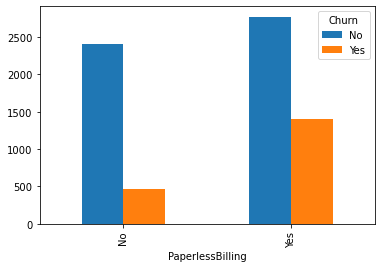

In [306]:
contingencia13.plot.bar()

<AxesSubplot:xlabel='Churn'>

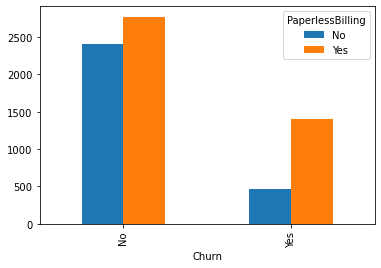

In [317]:
np.transpose(contingencia13).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='PaperlessBilling'>

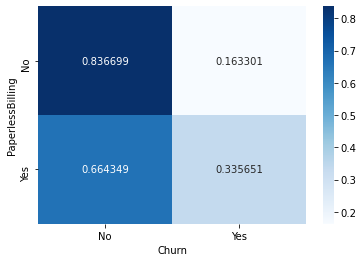

In [294]:
sn.heatmap(contingencia13.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')

### PaymentMethod vs churn

In [272]:
contingencia14

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [273]:
# contingencia14_

In [277]:
print("tabla de contingencia esperada")
print (conting_14)

tabla de contingencia esperada
[[1134.26891949  409.73108051]
 [1118.10705665  403.89294335]
 [1737.40025557  627.59974443]
 [1184.22376828  427.77623172]]


<AxesSubplot:xlabel='PaymentMethod'>

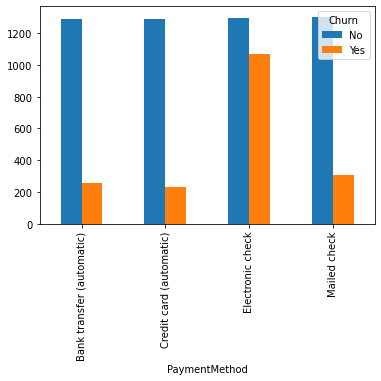

In [307]:
contingencia14.plot.bar()

<AxesSubplot:xlabel='Churn'>

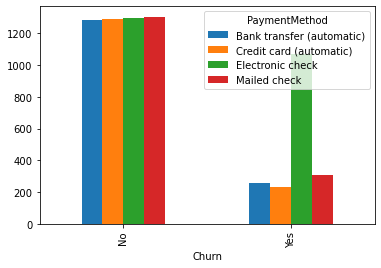

In [318]:
np.transpose(contingencia14).plot.bar()

<AxesSubplot:xlabel='Churn', ylabel='PaymentMethod'>

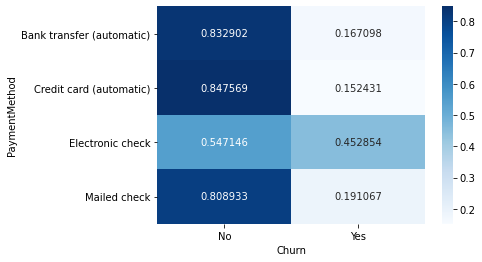

In [295]:
sn.heatmap(contingencia14.apply(lambda r: r/r.sum(), axis=1), annot = True,cmap='Blues', fmt='g')